24
24


(0.0, 1.1)

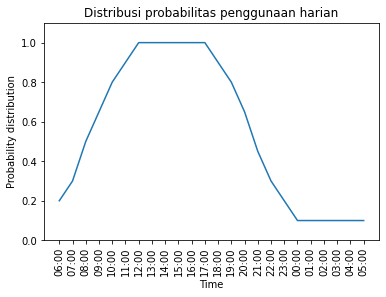

In [84]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('Distribusi probabilitas penggunaan harian')
plt.ylim([0.0,1.1])

In [85]:


map_width = 50
map_height = 50
moore = False
model = switching_model(num_of_motorist=50,num_of_stations=30,inv_size=10,cp_size= 10,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

#Dalam menit
num_of_step = 14*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

5


In [86]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive  Full_battery  Empty_battery  CP_full  \
Step AgentID                                                                
0    0           None  2600.0  None           NaN            NaN      NaN   
     1           None  2600.0  None           NaN            NaN      NaN   
     2           None  2600.0  None           NaN            NaN      NaN   
     3           None  2600.0  None           NaN            NaN      NaN   
     4           None  2600.0  None           NaN            NaN      NaN   

              CP_empty  
Step AgentID            
0    0             NaN  
     1             NaN  
     2             NaN  
     3             NaN  
     4             NaN

In [87]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
150     True
151    False
152    False
153     True
154     True
155    False
156     True
157    False
158    False
159    False
160     True
161    False
162     True
163     True
164     True
165    False
166    False
167     True
168     True
169    False
170     True
171    False
172     True
173     True
174    False
175     True
176    False
177     True
178     True
179     True
180     True
181     True
182    False
183     True
184     True
185     True
186    False
187     True
188    False
189    False
190     True
191    False
192     True
193     True
194     True
195    False
196     True
197     True
198     True
199     True
Name: Alive, dtype: object

In [88]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
200      (0, 0)
201     (49, 0)
202     (0, 49)
203    (49, 49)
204    (24, 24)
Name: Position, dtype: object


In [89]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
200    10.0
201    10.0
202    10.0
203    10.0
204    10.0
Name: Full_battery, dtype: float64


In [90]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
200    0.0
201    0.0
202    0.0
203    0.0
204    0.0
Name: Empty_battery, dtype: float64


In [91]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
200    10.0
201     9.0
202    10.0
203    10.0
204    10.0
Name: CP_full, dtype: float64


In [92]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
200    0.0
201    1.0
202    0.0
203    0.0
204    0.0
Name: CP_empty, dtype: float64


In [93]:
#Ambil data motorist
driver_num = 1
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (18, 24)
20156    (18, 24)
20157    (18, 24)
20158    (18, 24)
20159    (18, 24)
Name: Position, dtype: object

Text(0, 0.5, 'y')

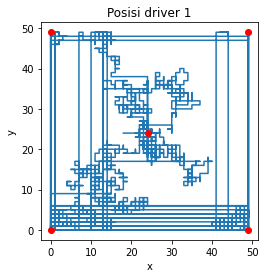

In [94]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='Step'>

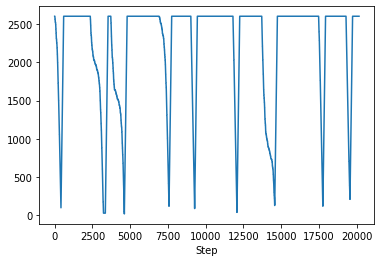

In [95]:
#Cek baterai
battery_id = 5
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()



In [96]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
20155,31
20156,31
20157,31
20158,31
20159,31


Text(0.5, 0, 'Steps')

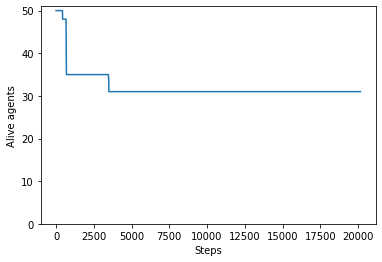

In [97]:
plt.plot(model_data)
plt.ylim([0,51])
plt.ylabel("Alive agents")
plt.xlabel("Steps")

In [98]:
a = [1,2,3]
b = a
b.remove(3)
print(a)

[1, 2]


In [99]:
print(agent_data.columns.tolist())

['Position', 'Charge', 'Alive', 'Full_battery', 'Empty_battery', 'CP_full', 'CP_empty']


In [100]:


#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

648541


In [101]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

648541


Text(33.0, 0.5, 'y')

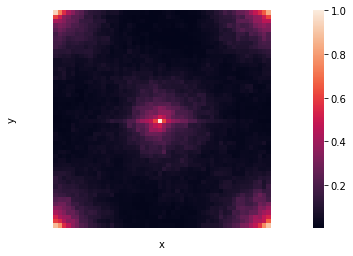

In [102]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')



    